|-------------------------------|-------------------------------|-----------------------------|
|:--                            |              :----:           |                        :---:|
|**Machine Learning**           |Dr. Hector Ceballos            |Dr. Neil Hernández           |
|**First Partial Exam**         |Adrián García López            |Sharif Nasser Kadamani       |
|18 / 09 / 2020                 |A01351166                      |A00820367                    |
|-------------------------------|-------------------------------|-----------------------------|

# Initialize analysis

## Import required modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load data

In [2]:
# Load dataset
df = pd.read_csv("ECOAS_MachineLearning_202013_puntajes.csv", encoding="latin-1")

'''
Classification of DocumentSentiment according to its value. 
(Changes from qualitative to quantitative variable)

    Excellent   E
    Good        G
    Regular     R
    Bad         B
'''
df['DocumentSentiment'] = np.where(df['DocumentSentiment'] > 0.50, 4, df['DocumentSentiment'])
df['DocumentSentiment'] = np.where(np.logical_and(df['DocumentSentiment'] <= 0.50, df['DocumentSentiment'] > 0), 3, df['DocumentSentiment'])
df['DocumentSentiment'] = np.where(np.logical_and(df['DocumentSentiment'] <= 0, df['DocumentSentiment'] > -0.50), 2, df['DocumentSentiment'])
df['DocumentSentiment'] = np.where(df['DocumentSentiment'] <= -0.50, 1, df['DocumentSentiment'])

df['DocumentSentiment'] = np.where(df['DocumentSentiment'] == 4.0, 'E', df['DocumentSentiment'])
df['DocumentSentiment'] = np.where(df['DocumentSentiment'] == "3.0", 'G', df['DocumentSentiment'])
df['DocumentSentiment'] = np.where(df['DocumentSentiment'] == "2.0", 'R', df['DocumentSentiment'])
df['DocumentSentiment'] = np.where(df['DocumentSentiment'] == "1.0", 'B', df['DocumentSentiment'])

df = df.drop(['ID', 'Rectoría', 'Campus', 'Tamaño', 'Latitud', 'Longitud', 'División', 
              'Departamento', 'AnonMateria', 'crn', 'Pregunta', 'NominaFict', 'TipoProfesor',
              'ProfesorTitular', 'Comentarios', 'sentimiento', 'Categoria', 'Subcategoria', 
              'EntitiesList'], axis=1)

# Get target and feature names
target_names = df['DocumentSentiment'].unique().tolist()
feature_names = ['APR', 'RET', 'REC']

# Get number of features and target names
n_targets = len(target_names)
n_features = len(feature_names)

# Separate features and target columns
X = df[feature_names]
y = df['DocumentSentiment']

# Exploratory Data Analysis

## Visualize quick info from data

In [3]:
df.head(10)

,DocumentSentiment,APR,RET,REC
0,G,9.59,9.67,9.41
1,G,9.59,9.67,9.41
2,R,9.59,9.67,9.41
3,G,9.59,9.67,9.41
4,G,9.59,9.67,9.41
5,G,9.59,9.67,9.41
6,G,9.59,9.67,9.41
7,G,9.59,9.67,9.41
8,R,9.59,9.67,9.41
9,R,9.59,9.67,9.41


In [4]:
df.describe()

,APR,RET,REC
count,69983.000000,69983.000000,69983.000000
mean,8.936814,9.074867,8.622936
std,0.842533,0.682638,1.161023
min,0.000000,0.000000,0.000000
25%,8.600000,8.800000,8.095000
50%,9.150000,9.230000,8.930000
75%,9.500000,9.530000,9.450000
max,10.000000,10.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69983 entries, 0 to 69982
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DocumentSentiment  69983 non-null  object 
 1   APR                69983 non-null  float64
 2   RET                69983 non-null  float64
 3   REC                69983 non-null  float64
dtypes: float64(3), object(1)
memory usage: 2.1+ MB


## Plot features in time

## Calculate Correlation Matrix

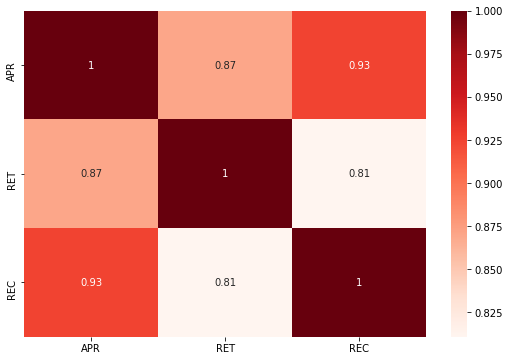

In [6]:
f, ax = plt.subplots(figsize=(9, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cmap=plt.cm.Reds)
plt.show()

## Visualize statistical distribution of data

### Boxplots: features and grouped by target value

In [ ]:
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(2, n_features, figsize=(20, 20))
    for num, name in enumerate(feature_names):
        sns.boxplot(y=name, data=df, ax=axes[0,num])
    for num, name in enumerate(feature_names):
        sns.boxplot(x='DocumentSentiment', y=name, data=df, ax=axes[1,num])

### Histograms: features

In [ ]:
with sns.axes_style("ticks"):    
    for name in feature_names:
        sns.displot(data=df, x=name)

### PairdGrid: scatterplots, histograms and kde plots colored by target value

In [ ]:
with sns.axes_style("ticks"):
    g = sns.PairGrid(df, hue="DocumentSentiment", size=5)
    g.map_diag(sns.histplot)
    g.map_upper(sns.scatterplot)
    g.map_lower(sns.kdeplot, levels=3)
    g.add_legend()
    plt.show()

# Train models

## Split Data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y) 
print('Shapes:', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('Target values distribution:\nTrain:\n', y_train.value_counts(normalize=True), '\nTest:\n', y_test.value_counts(normalize=True))

Shapes: (52487, 3) (17496, 3) (52487,) (17496,)
Target values distribution:
Train:
 G    0.549412
R    0.311182
E    0.111075
B    0.028331
Name: DocumentSentiment, dtype: float64 
Test:
 G    0.549440
R    0.311157
E    0.111111
B    0.028292
Name: DocumentSentiment, dtype: float64


## Train a Decision Tree Classifier

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Hyperparameter Optimization (Grid Search with Cross Validation)

In [9]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'criterion':('giny', 'entropy'),
                'max_depth': [2,4,6,8,10,12,14,16,18]}

dt = DecisionTreeClassifier()
clf = GridSearchCV(estimator=dt, param_grid=parameters, cv=5, scoring='f1_macro')
clf = clf.fit(X_train, y_train)
print('Best parameters:\n', clf.best_params_)
print('\nModel parameters:\n', clf.get_params())

C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: 'giny'

  FitFailedWarning)
C:\Users\Adrian Garcia Lopez\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these par

Best parameters:
 {'criterion': 'entropy', 'max_depth': 18}

Model parameters:
 {'cv': 5, 'error_score': nan, 'estimator__ccp_alpha': 0.0, 'estimator__class_weight': None, 'estimator__criterion': 'gini', 'estimator__max_depth': None, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__presort': 'deprecated', 'estimator__random_state': None, 'estimator__splitter': 'best', 'estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       r

### Evaluate model

Classification Report:
               precision    recall  f1-score   support

           B       0.02      0.00      0.00       495
           E       0.14      0.02      0.04      1944
           G       0.56      0.87      0.68      9613
           R       0.36      0.14      0.21      5444

    accuracy                           0.52     17496
   macro avg       0.27      0.26      0.23     17496
weighted avg       0.43      0.52      0.44     17496



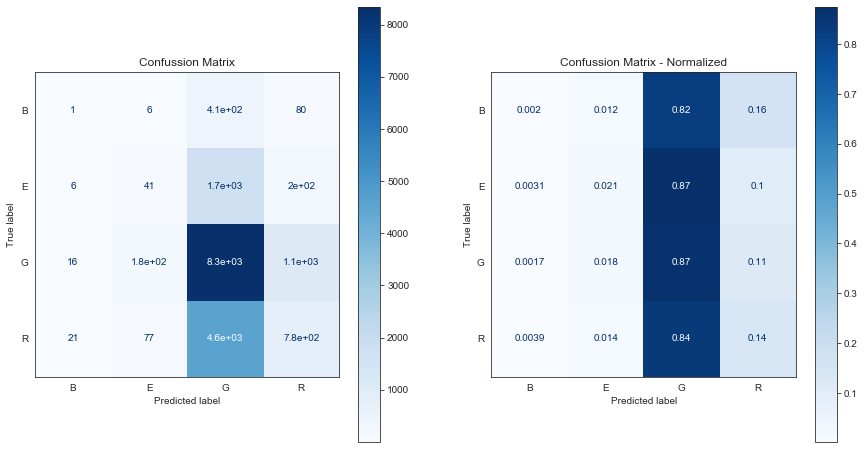

In [10]:
with sns.axes_style("white"):
    y_pred = clf.predict(X_test)
    print('Classification Report:\n',metrics.classification_report(y_test, y_pred))
    fig, axes = plt.subplots(1, 2, figsize=(15,8))
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=axes[0])
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=axes[1])
    axes[0].set_title('Confussion Matrix')
    axes[1].set_title('Confussion Matrix - Normalized')
    plt.show()

## Train Support Vector Machine

### Hyperparameter Optimization (Grid Search with Cross Validation)

In [ ]:
# from sklearn import svm

# parameters = [{'kernel': ['rbf'], 'gamma': [1,0.1,0.001,0.0001], 'C': [1, 10, 100, 1000]},
#                 {'kernel': ['poly'], 'C': [1, 10, 100, 1000]}]

# svc = svm.SVC()
# clf = GridSearchCV(estimator=svc, param_grid=parameters, cv=5, scoring='f1_macro')
# clf = clf.fit(X_train, y_train)
# print('Best parameters:\n', clf.best_params_)
# print('\nModel parameters:\n', clf.get_params())

### Evaluate model

In [ ]:
with sns.axes_style("white"):
    y_pred = clf.predict(X_test)
    print('Classification Report:\n',metrics.classification_report(y_test, y_pred))
    fig, axes = plt.subplots(1, 2, figsize=(15,8))
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, ax=axes[0])
    metrics.plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true', ax=axes[1])
    axes[0].set_title('Confussion Matrix')
    axes[1].set_title('Confussion Matrix - Normalized')
    plt.show()

## Train Neural Network

In [11]:
#plt.style.use('ggplot')
#%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

### Scale features and encode target values

In [12]:
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Split transformed data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.25, stratify=Y)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 10, i, 'model_{}'.format(i)) 
          for i in range(3, 12)]

for create_model in models:
    create_model().summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 44        
Total params: 304
Trainable params: 304
Non-trainable params: 0
_________________________________________________________________
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                40        
____________________________________________

In [ ]:
from keras.callbacks import TensorBoard

history_dict = {}

cb = TensorBoard()

for create_model in models:
    model = create_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, Y_train,
                                 batch_size=5,
                                 epochs=50,
                                 verbose=0,
                                 validation_data=(X_test, Y_test),
                                 callbacks=[cb])
    score = model.evaluate(X_test, Y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    history_dict[model.name] = [history_callback, model]

Model name: model_3
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
Test loss: 1.0233383178710938
Test accuracy: 0.5497828125953674
Model name: model_4
Test loss: 1.025726556777954
Test accuracy: 0.550297200679779
Model name: model_5
Test loss: 1.0236151218414307
Test accuracy: 0.5517261028289795
Model name: model_6
Test loss: 1.024571180343628
Test accuracy: 0.550297200679779
Model name: model_7
Test loss: 1.0231295824050903
Test accuracy: 0.5512688755989075
Model name: model_8


In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_acc = history_dict[model_name][0].history['accuracy']
    print("val_acc: ", val_acc)
    val_loss = history_dict[model_name][0].history['val_loss']
    print("val_loss: ", val_loss)
    ax1.plot(val_acc, label=model_name)
    ax2.plot(val_loss, label=model_name)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

for model_name in history_dict:
    model = history_dict[model_name][1]
    
    Y_pred = model.predict(X_test)
    fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
    plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format(model_name, auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

### Train Neural Network with best parameters

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

create_model = create_custom_model(n_features, n_classes, 10, 9)

clf = KerasClassifier(build_fn=create_model, epochs=100, batch_size=5, verbose=0)
clf.fit(X_train, Y_train)

In [ ]:
with sns.axes_style("white"):
    y_pred = clf.predict(X_test)
    y_test = Y_test.argmax(axis=1)
    target_names_ = sorted(target_names)
    print('Classification Report:\n',metrics.classification_report(y_test, y_pred, target_names=target_names_))
    fig, axes = plt.subplots(1, 2, figsize=(15,8))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True, cmap=plt.cm.Blues, fmt='.4g', xticklabels=target_names_, yticklabels=target_names_, ax=axes[0])
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred, normalize='true'), annot=True, cmap=plt.cm.Blues, xticklabels=target_names_, yticklabels=target_names_, ax=axes[1])
    axes[0].set_title('Confussion Matrix')
    axes[1].set_title('Confussion Matrix - Normalized')
    plt.show()